<a href="https://colab.research.google.com/github/crodriguezbay/MLforMkting/blob/main/l07_sentiment_analisis_clase_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div >
<img src = "figs/bannerMLMkting.png" />
</div>

# Análisis de sentimientos

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaciomsarmiento/RecomSystemsLectures/blob/main/L07_sentimientos/L07_sentiment_analisis_clase.ipynb)

El análisis de sentimientos es un campo interdisciplinario que involucra matemáticas, estadística, informática y lingüística, entre otros. A continuación, te explico brevemente la matemática detrás del análisis de sentimientos:

En primer lugar, el análisis de sentimientos utiliza modelos matemáticos para representar el tono emocional de un texto. Por ejemplo, un modelo comúnmente utilizado es el modelo de bolsa de palabras (bag-of-words), que representa el texto como una colección de palabras, ignorando el orden en que aparecen. Este modelo se utiliza para calcular la frecuencia de cada palabra en el texto y, a partir de ahí, determinar su polaridad emocional.

Para determinar la polaridad emocional de una palabra, se utilizan diccionarios de palabras que han sido previamente clasificadas como positivas, negativas o neutrales. Estos diccionarios se construyen mediante el análisis de grandes conjuntos de datos, donde se etiquetan las palabras según su tono emocional. Palabras como:

* Bueno.
* Excelente.
* Malo.
* pésimo.

Dan polaridad a nuestro estudio,

Una vez que se ha calculado la polaridad emocional de cada palabra en el texto, se utiliza un algoritmo de clasificación para asignar una polaridad emocional al texto en su conjunto. Los algoritmos más comunes son el análisis de sentimiento basado en reglas y el análisis de sentimiento basado en aprendizaje automático.

En términos de aplicaciones reales, el análisis de sentimientos se utiliza en una amplia variedad de campos y situaciones. Algunas aplicaciones comunes son:

* Medición de la satisfacción del cliente: las empresas pueden utilizar el análisis de sentimientos para medir la satisfacción del cliente en las redes sociales o en los comentarios de los clientes en línea.

* Análisis de la opinión pública: los gobiernos y los grupos de interés pueden utilizar el análisis de sentimientos para medir la opinión pública sobre temas políticos o sociales.

* Análisis de la percepción de la marca: las empresas pueden utilizar el análisis de sentimientos para medir la percepción de la marca entre los consumidores.
* Análisis de la efectividad publicitaria: las empresas pueden utilizar el análisis de sentimientos para medir la efectividad de sus campañas publicitarias.

En resumen, el análisis de sentimientos es una técnica poderosa que se utiliza para medir el tono emocional de un texto y comprender mejor las opiniones y actitudes de las personas. Utiliza modelos matemáticos y algoritmos de clasificación para lograr esto, y tiene aplicaciones en una amplia variedad de campos y situaciones.

# *Ejemplo usando la librería Sentiment Analysis:*

**1) CARGUE Y ANALISIS PRELIMINAR**

Cargue de librerias:

In [57]:
# required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Cargue de la base y análisis de la misma:

In [58]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/RecomSystemsLectures/main/L07_sentimientos/data/Amazon.csv', index_col="Unnamed: 0")

In [59]:
data.head()

,id,reviews.text,reviews.rating,reviews.text_esp
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has never had one before.,5.0,Esta es una tableta muy agradable para mi novia que nunca antes había tenido una.
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was right,5.0,Me encanta esta tableta. Fácil de usar. Y el precio era correcto
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Amazon fire tablet,5.0,Precio asequible calidad increíble Me encanta mi tableta Amazon Fire
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep in Tigertown. I bought this for my kid and he loves it. Its my 2nd kindle.,5.0,Compré esto después de hablar con un representante de ventas en Tigertown. Compré esto para mi hijo y le encanta. Es mi segundo kindle.
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and it is perfect. Games and videos that come on it are very age appropriate and the tablet has been very durable thus far.,5.0,Compré esta tableta para mi hijo de 2 años y medio y es perfecta. Los juegos y videos que vienen son muy apropiados para la edad y la tableta ha sido muy duradera hasta ahora.


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2000 non-null   object 
 1   reviews.text      2000 non-null   object 
 2   reviews.rating    2000 non-null   float64
 3   reviews.text_esp  2000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 78.1+ KB


In [61]:
data["reviews.rating"]=data["reviews.rating"].astype(int)

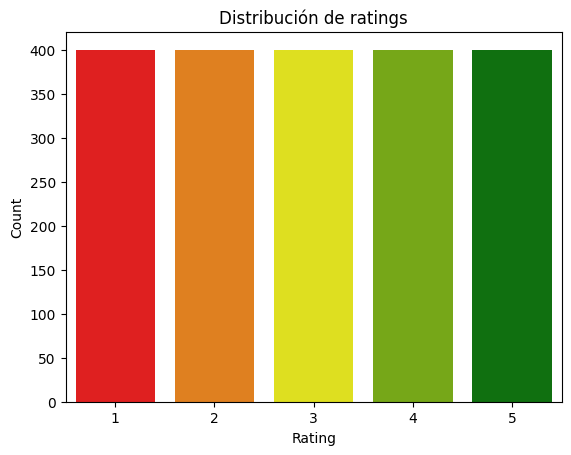

In [62]:
from matplotlib.colors import LinearSegmentedColormap


# Define the colors: red for 1, blue for 5
colors = LinearSegmentedColormap.from_list("red_to_blue", ["red","yellow", "green"])

# Create a palette for ratings 1 to 5
ratings_range = range(1, 6)  # Ratings from 1 to 5
palette = sns.color_palette(colors(np.linspace(0, 1, len(ratings_range))))

# Plot the countplot with the custom palette
sns.countplot(x='reviews.rating', data=data, palette=palette)

# Add labels and title
plt.title('Distribución de ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [63]:
# map ratings 1, 2, 3 a 0 (NEGATIVE) y 4, 5 a 1 (POSITIVE)

sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}

# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

## Map es una funcion util y puede usarse como alternativa a los fors.
# list(map(funcion, lista))
#numbers = [10, 15, 21, 33, 42, 55]
#mapped_numbers = list(map(lambda x: x * 2 + 3, numbers))

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has never had one before.,5,Esta es una tableta muy agradable para mi novia que nunca antes había tenido una.,1,POSITIVE
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was right,5,Me encanta esta tableta. Fácil de usar. Y el precio era correcto,1,POSITIVE
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Amazon fire tablet,5,Precio asequible calidad increíble Me encanta mi tableta Amazon Fire,1,POSITIVE
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep in Tigertown. I bought this for my kid and he loves it. Its my 2nd kindle.,5,Compré esto después de hablar con un representante de ventas en Tigertown. Compré esto para mi hijo y le encanta. Es mi segundo kindle.,1,POSITIVE
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and it is perfect. Games and videos that come on it are very age appropriate and the tablet has been very durable thus far.,5,Compré esta tableta para mi hijo de 2 años y medio y es perfecta. Los juegos y videos que vienen son muy apropiados para la edad y la tableta ha sido muy duradera hasta ahora.,1,POSITIVE


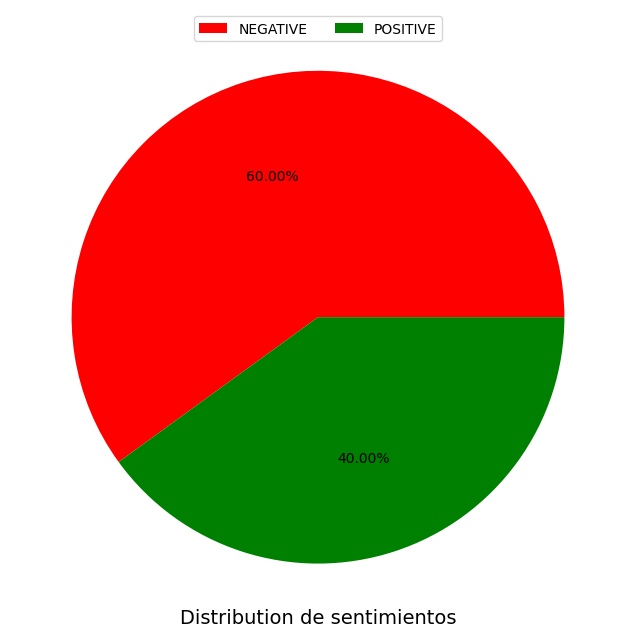

In [64]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['NEGATIVE','POSITIVE']
colors = ['red', 'green']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution de sentimientos', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

**2) PROCESAMIENTO DE LENGUAJE DE NATURAL:**

In [65]:
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter


In [66]:
pip install unidecode

In [67]:
# Eliminamos stopwords
from nltk.corpus import stopwords
import unidecode
nltk.download('stopwords')
stopwords = set(stopwords.words("spanish"))
#stopwords.extend(['five'])

# Creamos un diccionario de stopwords en español
stopwords = [unidecode.unidecode(i) for i in stopwords]
stopwords = set(stopwords)
stop_words=list(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
## Limpieza de texto.
def clean_text(text:str)-> str:
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)
        output: cleaned text (str)
    """
    text = str(text)

    text = text.lower()
    text = text.strip()

    text = re.sub(' \d+', ' ', text)

    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    text = text.strip()

    return text

def stopword(string):
    a= [i for i in string.split() if i not in stopwords]
    return ' '.join(a)

In [69]:
data

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has never had one before.,5,Esta es una tableta muy agradable para mi novia que nunca antes había tenido una.,1,POSITIVE
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was right,5,Me encanta esta tableta. Fácil de usar. Y el precio era correcto,1,POSITIVE
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Amazon fire tablet,5,Precio asequible calidad increíble Me encanta mi tableta Amazon Fire,1,POSITIVE
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep in Tigertown. I bought this for my kid and he loves it. Its my 2nd kindle.,5,Compré esto después de hablar con un representante de ventas en Tigertown. Compré esto para mi hijo y le encanta. Es mi segundo kindle.,1,POSITIVE
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and it is perfect. Games and videos that come on it are very age appropriate and the tablet has been very durable thus far.,5,Compré esta tableta para mi hijo de 2 años y medio y es perfecta. Los juegos y videos que vienen son muy apropiados para la edad y la tableta ha sido muy duradera hasta ahora.,1,POSITIVE
...,...,...,...,...,...,...
1995,AVpfl8cLLJeJML43AE3S,I'm returning it because a new version is coming i,1,Lo devuelvo porque viene una nueva versión,0,NEGATIVE
1996,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with any type of charging cords so I had to purchase one and then found my Sprint HTC 3D charger is faster. I would not purchase again- 1st item I've ever not liked I've purchased from Amazon,1,"Me sorprendió descubrir que no venía con ningún tipo de cable de carga, así que tuve que comprar uno y luego descubrí que mi cargador Sprint HTC 3D es más rápido. No volvería a comprar: el primer artículo que no me ha gustado lo he comprado en Amazon",0,NEGATIVE
1997,AVpidLjVilAPnD_xEVpI,Expected it to be a bigger version of the HDX but it was not. The email was bad and so was the calendar.,1,"Esperaba que fuera una versión más grande del HDX, pero no lo fue. El correo electrónico era malo y también lo era el calendario.",0,NEGATIVE
1998,AV1YE_muvKc47QAVgpwE,Never bought this item at all. So i guess you must have the wrong person,1,Nunca compré este artículo en absoluto. Así que supongo que debes tener a la persona equivocada,0,NEGATIVE


In [70]:
# remove stopwords
data['text'] = data['reviews.text_esp'].apply(clean_text)
data['text']=data['text'].apply(stopword)

In [71]:
data['text']=data['text'].str.replace("á","a").str.replace("é","e").str.replace("í","i").str.replace("ó","o").str.replace("ú","u")

In [72]:
from nltk.stem import SnowballStemmer
spanish_stemmer = SnowballStemmer('spanish')

def stemmer(texto):
    return(spanish_stemmer.stem(texto))


In [73]:
data['text_stemmed']=data['text'].apply(stemmer)

**C) OBSERVACIÓN DE NUBES DE PALABRAS**

In [74]:
# Graficos de palbras.

# todas las palabras
all_words = pd.Series(' '.join(data['text']).split())
all_stems = pd.Series(' '.join(data['text_stemmed']).split())

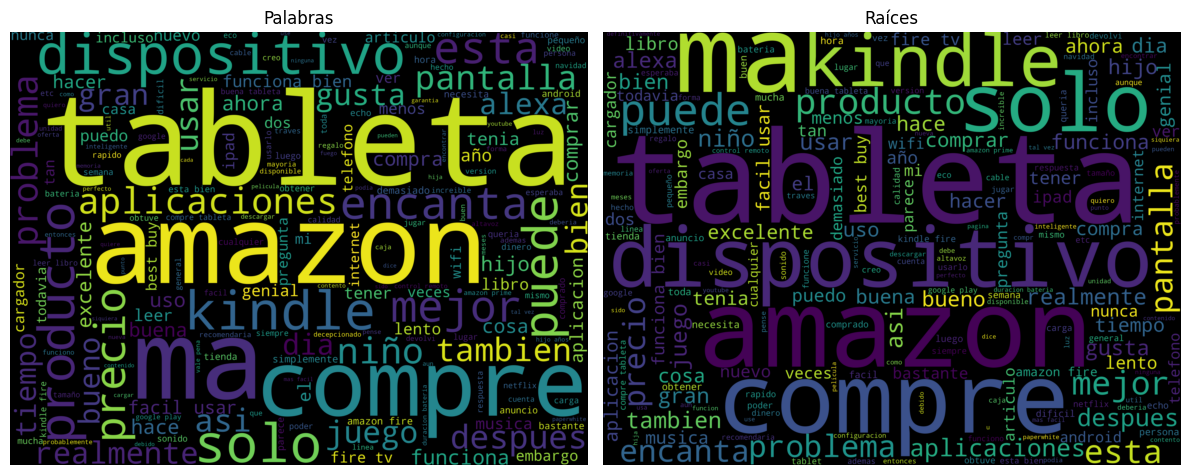

In [75]:
# plot word cloud
wordcloud1 = WordCloud(width = 4000, height = 3000).generate(' '.join(all_words))
wordcloud2 = WordCloud(width = 4000, height = 3000).generate(' '.join(all_stems))

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the first word cloud
ax[0].imshow(wordcloud1, interpolation='bilinear')
ax[0].axis('off')  # Turn off axis
ax[0].set_title("Palabras")

# Display the second word cloud
ax[1].imshow(wordcloud2, interpolation='bilinear')
ax[1].axis('off')  # Turn off axis
ax[1].set_title("Raíces")

# Adjust layout and display
plt.tight_layout()
plt.show()

In [76]:
# get words used positive reivews
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['text']).split())

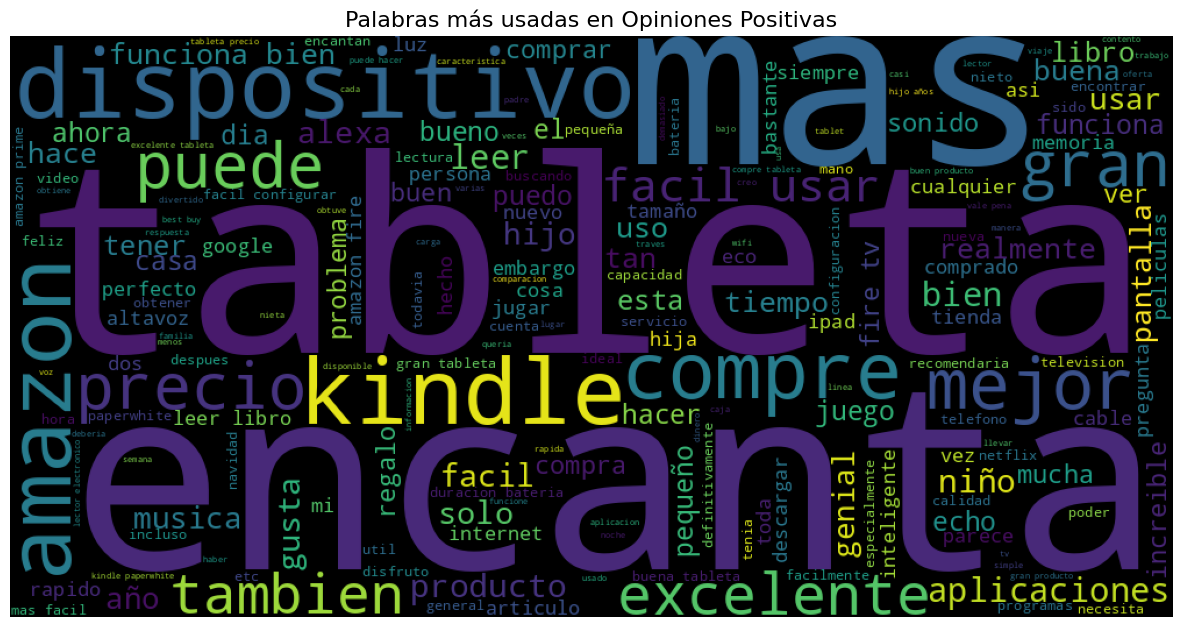

In [77]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras más usadas en Opiniones Positivas", size=16)

plt.axis("off")
plt.show()

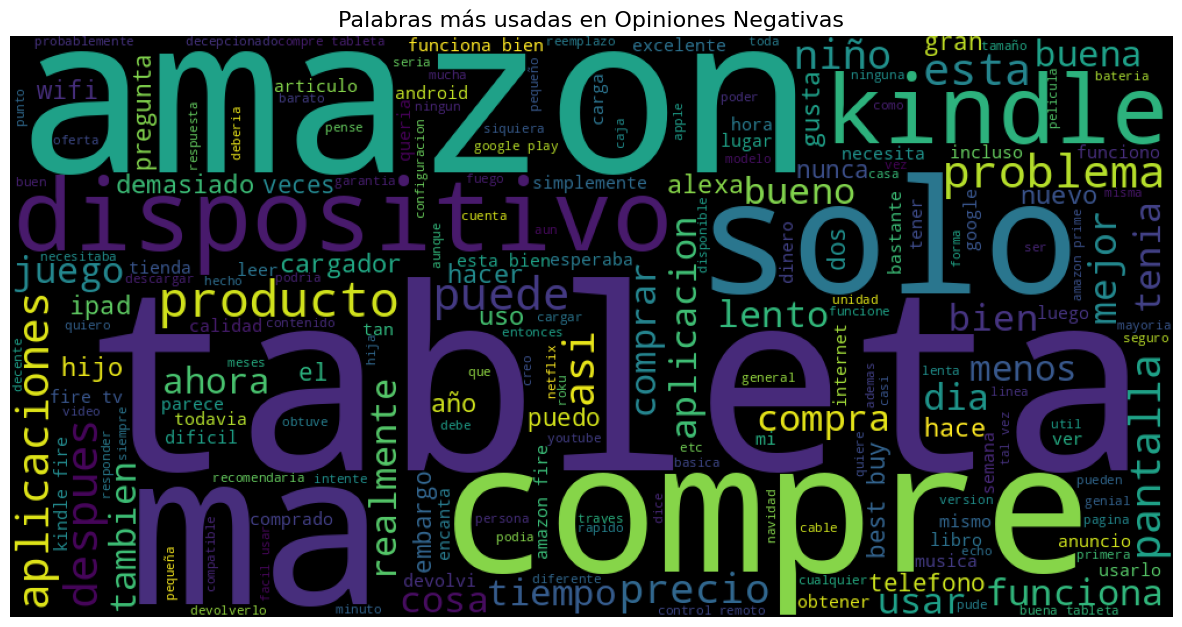

In [78]:
# get words used positive reivews
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['text']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras más usadas en Opiniones Negativas", size=16)

plt.axis("off")
plt.show()

**D) APLICACION DE PAQUETE SENTIMENT ANALYSIS EN ESPAÑOL:**

In [79]:
pip install sentiment_analysis_spanish

Se crea una función que aplica el análisis de sentimiento calculando un "score" siendo 0 un resultado más negativo y 1 un resultado más positivo.

In [80]:
from sentiment_analysis_spanish import sentiment_analysis
def analysis_sentimientos(x):
    sa=sentiment_analysis.SentimentAnalysisSpanish()
    return(sa.sentiment(x))

In [81]:
## Seleccionar una muestra
data5 = data[data['reviews.rating']==5].sample(20,random_state=43)
data4 = data[data['reviews.rating']==4].sample(20,random_state=43)
data3 = data[data['reviews.rating']==3].sample(20,random_state=43)
data2 = data[data['reviews.rating']==2].sample(20,random_state=43)
data1 = data[data['reviews.rating']==1].sample(20,random_state=43)

data2 = pd.concat([data5,data4,data3,data2,data1])

In [82]:
data2.reset_index(drop=True, inplace=True)

In [83]:
'''#data["score"]=data["text"].apply(analysis_sentimientos)
data2["score"]=data2["text"].apply(analysis_sentimientos)

#demora aprox 13 mins'''

'#data["score"]=data["text"].apply(analysis_sentimientos)\ndata2["score"]=data2["text"].apply(analysis_sentimientos)\n\n#demora aprox 13 mins'

In [84]:
from joblib import Parallel, delayed
data2["score_SA"] = Parallel(n_jobs=8)(delayed(analysis_sentimientos)(text) for text in data2["text"])

#Corrió en 10 mins con 4 jobs y

In [85]:
data2.iloc[23]["reviews.text_esp"]

'Compré esto para mi novia ya que ella está en su teléfono jugando, etc. Lo he usado varias veces y me gusta.'

In [86]:
data2["score_SA"]

,score_SA
0,0.977333
1,0.620469
2,0.637174
3,0.059778
4,0.115839
...,...
95,0.010412
96,0.050917
97,0.047558
98,0.005742


In [87]:
data2

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment,text,text_stemmed,score_SA
0,AVpfpK8KLJeJML43BCuD,"This speaker has a great sound and its perfect to take out on the patio or in any room that I am in. The tap is annoying compared to the Echo with voice activation, but the wireless features makes the purchase worth it.",5,"Este altavoz tiene un gran sonido y es perfecto para salir al patio o en cualquier habitación en la que me encuentre. El toque es molesto en comparación con el Echo con activación por voz, pero las funciones inalámbricas hacen que la compra valga la pena.",1,POSITIVE,altavoz gran sonido perfecto salir patio cualquier habitacion encuentre toque molesto comparacion echo activacion voz funciones inalambricas hacen compra valga pena,altavoz gran sonido perfecto salir patio cualquier habitacion encuentre toque molesto comparacion echo activacion voz funciones inalambricas hacen compra valga pen,0.977333
1,AVpfl8cLLJeJML43AE3S,"While I purchased this item as a gift for my son, it proved to be one of the best choices I could have made. He loves Alexa and the ability to ask her whatever seems to be on his mind. Echo is a wonderful complement to information availability and information technology to better our lives. A great gift and a most useful item.",5,"Si bien compré este artículo como regalo para mi hijo, resultó ser una de las mejores elecciones que pude haber hecho. Ama a Alexa y la capacidad de preguntarle lo que parece estar en su mente. Echo es un complemento maravilloso para la disponibilidad de información y la tecnología de la información para mejorar nuestras vidas. Un gran regalo y un artículo muy útil.",1,POSITIVE,bien compre articulo regalo hijo resulto ser mejores elecciones pude haber hecho ama alexa capacidad preguntarle parece mente echo complemento maravilloso disponibilidad informacion tecnologia informacion mejorar vidas gran regalo articulo util,bien compre articulo regalo hijo resulto ser mejores elecciones pude haber hecho ama alexa capacidad preguntarle parece mente echo complemento maravilloso disponibilidad informacion tecnologia informacion mejorar vidas gran regalo articulo util,0.620469
2,AVpfl8cLLJeJML43AE3S,I love my Echo that I received for Christmas from my wife that I bought it for my son in law for his birthday. He has Amazon prime so he can do much more with the Echo. I will be subscribing also.,5,Me encanta mi Echo que recibí en Navidad de mi esposa que se lo compré a mi yerno por su cumpleaños. Tiene Amazon prime para que pueda hacer mucho más con el Echo. Me suscribiré también.,1,POSITIVE,encanta echo recibi navidad esposa compre yerno cumpleaños amazon prime pueda hacer mas echo suscribire tambien,encanta echo recibi navidad esposa compre yerno cumpleaños amazon prime pueda hacer mas echo suscribire tambi,0.637174
3,AV1YnRtnglJLPUi8IJmV,Does all they claim. Am really enjoying my new Kindle.,5,Hace todo lo que dicen. Realmente estoy disfrutando de mi nuevo Kindle.,1,POSITIVE,hace dicen realmente disfrutando nuevo kindle,hace dicen realmente disfrutando nuevo kindl,0.059778
4,AVpjEN4jLJeJML43rpUe,Good way to get started for kids to play with and they can learn,5,Buena manera de empezar para que los niños jueguen y puedan aprender.,1,POSITIVE,buena manera empezar niños jueguen puedan aprender,buena manera empezar niños jueguen puedan aprend,0.115839
...,...,...,...,...,...,...,...,...,...
95,AV1YE_muvKc47QAVgpwE,Bought two of these 2015 models to add to my previous model on other sets in the house. Both of the new units freeze after about 10 - 15 minutes stating that my 16 MB connection speed isn't fast enough for watching old documentaries from my Prime account. Cycling the power gets it working until it freezes again. The old model works flawlessly. I'll be returning these.,1,"Compré dos de estos modelos 2015 para agregar a mi modelo anterior en otros juegos de la casa. Ambas unidades nuevas se congelan después de unos 10 a 15 minutos, lo que indica

In [88]:
resultados=data2[["sentiment","score_SA","reviews.text_esp","sentiment_score","reviews.rating"]]

In [89]:
pd.set_option('display.max_colwidth', None)

In [90]:
resultados[resultados["reviews.rating"]==5]

,sentiment,score_SA,reviews.text_esp,sentiment_score,reviews.rating
0,POSITIVE,0.977333,"Este altavoz tiene un gran sonido y es perfecto para salir al patio o en cualquier habitación en la que me encuentre. El toque es molesto en comparación con el Echo con activación por voz, pero las funciones inalámbricas hacen que la compra valga la pena.",1,5
1,POSITIVE,0.620469,"Si bien compré este artículo como regalo para mi hijo, resultó ser una de las mejores elecciones que pude haber hecho. Ama a Alexa y la capacidad de preguntarle lo que parece estar en su mente. Echo es un complemento maravilloso para la disponibilidad de información y la tecnología de la información para mejorar nuestras vidas. Un gran regalo y un artículo muy útil.",1,5
2,POSITIVE,0.637174,Me encanta mi Echo que recibí en Navidad de mi esposa que se lo compré a mi yerno por su cumpleaños. Tiene Amazon prime para que pueda hacer mucho más con el Echo. Me suscribiré también.,1,5
3,POSITIVE,0.059778,Hace todo lo que dicen. Realmente estoy disfrutando de mi nuevo Kindle.,1,5
4,POSITIVE,0.115839,Buena manera de empezar para que los niños jueguen y puedan aprender.,1,5
5,POSITIVE,0.531025,Siento que esta tableta fue perfecta para mis hijos de 8 y 6 años.,1,5
6,POSITIVE,0.337111,Kindle Paprrwjite es el mejor lector electrónico que existe. ¡A por ello!,1,5
7,POSITIVE,0.417093,"Amazon Echo puede hacerlo todo. Lo uso principalmente para reproducir música, configurar temporizadores y hacerle preguntas, pero eventualmente lo usaré para controlar los artículos del hogar.",1,5
8,POSITIVE,0.900524,Súper divertido de conectar con bombillas inteligentes y enchufes inteligentes: te hace sentir como si tuvieras una casa Jetson. Los resúmenes informativos personalizados también son una buena manera de comenzar el día.,1,5
9,POSITIVE,0.988740,"Compré esto en lugar del Fire Stick para emparejarlo con mi nuevo televisor 4K. Fácil de usar, gran selección, diseño pequeño y elegante se combina con mi sistema de entretenimiento.",1,5


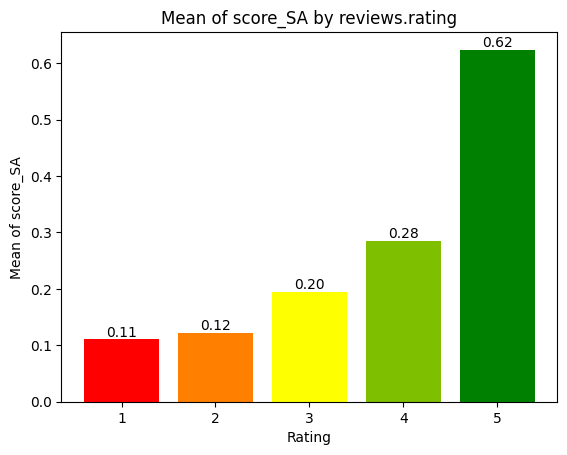

In [91]:
# Aggregate data: Calculate the mean of score_SA for each reviews.rating
mean_scores = data2.groupby('reviews.rating')['score_SA'].mean().reset_index()

# Define the custom colormap (red to green)
colors = LinearSegmentedColormap.from_list("red_to_green", ["red","yellow", "green"])

# Create a palette for ratings 1 to 5
ratings_range = range(1, 6)  # Ratings from 1 to 5
palette = sns.color_palette(colors(np.linspace(0, 1, len(ratings_range))))

# Map the palette to the ratings for consistent coloring
color_mapping = dict(zip(ratings_range, palette))
bar_colors = mean_scores['reviews.rating'].map(color_mapping)

# Plot the bar chart
bars = plt.bar(mean_scores['reviews.rating'], mean_scores['score_SA'], color=bar_colors)

# Annotate each bar with its mean score_SA value
for bar, score in zip(bars, mean_scores['score_SA']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        bar.get_height(),  # Y position (top of the bar)
        f'{score:.2f}',  # Format the value to 2 decimal places
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )


# Add labels and title
plt.title('Mean of score_SA by reviews.rating')
plt.xlabel('Rating')
plt.ylabel('Mean of score_SA')
plt.xticks(ratings_range)  # Ensure x-axis ticks match the ratings
plt.show()

La gráfica muestra que tiene lógica el valor otorgado a través del análisis de texto vs. el rating otorgado en el comentario.

# *Ejemplo usando la Bag of Words:*



"Bag of Words" (BoW) es un método utilizado en el procesamiento de lenguaje natural para representar el texto como una matriz de conteo de palabras. En el análisis de sentimientos, el BoW se utiliza para extraer características del texto que luego se utilizan para clasificarlo como positivo o negativo.

La idea detrás de BoW es tratar cada documento (en este caso, una reseña o comentario) como una "bolsa" de palabras, ignorando el orden en que aparecen en el texto y solo contando su frecuencia. El proceso implica los siguientes pasos:

Tokenización: el texto se divide en palabras individuales, eliminando la puntuación y los caracteres especiales.

Creación de vocabulario: se crea una lista de todas las palabras únicas en todo el corpus de texto.

Vectorización: se crea una matriz donde cada fila representa un documento y cada columna representa una palabra única. El valor en cada celda representa la frecuencia de esa palabra en ese documento.

Normalización: las frecuencias se ajustan para tener en cuenta la longitud del documento y la frecuencia de la palabra en todo el corpus.

Una vez que se ha creado la matriz de BoW, se puede usar para entrenar un modelo de clasificación, como la regresión logística, que puede predecir si una reseña o comentario es positivo o negativo en función de las palabras que contiene. El modelo se entrena utilizando un conjunto de datos de entrenamiento etiquetado que contiene reseñas o comentarios positivos y negativos.

In [92]:
pip install requests pandas

In [93]:
import requests



# Function to translate text using Google Translate unofficial API
def translate_text(text):
    try:
        url = "https://translate.googleapis.com/translate_a/single"
        params = {
            "client": "gtx",
            "sl": "es",  # Source language
            "tl": "en",  # Target language
            "dt": "t",
            "q": text,
        }
        response = requests.get(url, params=params)
        response.raise_for_status()  # Check for HTTP request errors
        # Join all segments of the response into one translated text
        translated_segments = [segment[0] for segment in response.json()[0]]
        return " ".join(translated_segments)  # Combine all segments
    except Exception as e:
        print(f"Translation error for '{text}': {e}")
        return text  # Return original text if translation fails

# Apply the translation function to the DataFrame
data['TextTraducido'] = data['text'].apply(translate_text)

# Display the DataFrame
data[['text', 'TextTraducido']]

,text,TextTraducido
0,tableta agradable novia nunca habia,tablet nice girlfriend never had
1,encanta tableta facil usar precio correcto,love tablet easy to use right price
2,precio asequible calidad increible encanta tableta amazon fire,affordable price amazing quality love amazon fire tablet
3,compre despues hablar representante ventas tigertown compre hijo encanta segundo kindle,buy later talk sales representative tigertown buy son loves second kindle
4,compre tableta hijo años medio perfecta juegos videos vienen apropiados edad tableta sido duradera ahora,buy tablet son years old perfect games videos come age appropriate tablet been durable now
...,...,...
1995,devuelvo viene nueva version,I return a new version comes
1996,sorprendio descubrir venia ningun tipo cable carga asi comprar luego descubri cargador sprint htc d mas rapido volveria comprar primer articulo gustado comprado amazon,I was surprised to discover that it came with no type of charging cable so buy then I discovered the sprint htc d charger faster I would buy again first item liked bought amazon
1997,esperaba version mas grande hdx correo electronico malo tambien calendario,I was expecting a larger version hdx bad email also calendar
1998,nunca compre articulo absoluto asi supongo debes tener persona equivocada,I never bought an absolute item so I guess you must have the wrong person.


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

In [95]:
stopwords = nltk.corpus.stopwords.words("english")

In [96]:
#stopwords.extend(['five'])

In [97]:
def stopword(string):
    a= [i for i in string.split() if i not in stopwords]
    return ' '.join(a)

In [100]:
data["TextTraducido"]=data["TextTraducido"].apply(stopword)

### **Count Vector**

Count Vector es una técnica de vectorización de texto que se utiliza para convertir el texto en una matriz numérica de conteo de palabras. Esta técnica forma parte del proceso de Bag of Words (BoW) que se utiliza en el análisis de texto.

La técnica de Count Vector implica los siguientes pasos:

* Tokenización: el texto se divide en palabras individuales.

* Creación de vocabulario: se crea una lista de todas las palabras únicas en todo el corpus de texto.

* Conteo de palabras: se cuenta la frecuencia de cada palabra en cada documento.

* Vectorización: se crea una matriz donde cada fila representa un documento y cada columna representa una palabra única. El valor en cada celda representa el número de veces que aparece esa palabra en ese documento.

El resultado final es una matriz de números enteros que representa el conteo de palabras en cada documento. Esta matriz se puede utilizar para entrenar un modelo de aprendizaje automático para el análisis de texto, como la regresión logística o el árbol de decisión.

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
import pandas

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bowmatrix = vectorizer.fit_transform(data["TextTraducido"])

In [105]:
bowmatrix.toarray().shape

(2000, 3932)

In [106]:
print(bowmatrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## **Stemming**

In [107]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
porter_stemmer = PorterStemmer()

In [110]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

data["TextTraducidoStem"] = data["TextTraducido"].apply(stem_sentences)

In [112]:
data[["TextTraducido","TextTraducidoStem"]]

,TextTraducido,TextTraducidoStem
0,tablet nice girlfriend never,tablet nice girlfriend never
1,love tablet easy use right price,love tablet easi use right price
2,affordable price amazing quality love amazon fire tablet,afford price amaz qualiti love amazon fire tablet
3,buy later talk sales representative tigertown buy son loves second kindle,buy later talk sale repres tigertown buy son love second kindl
4,buy tablet son years old perfect games videos come age appropriate tablet durable,buy tablet son year old perfect game video come age appropri tablet durabl
...,...,...
1995,I return new version comes,i return new version come
1996,I surprised discover came type charging cable buy I discovered sprint htc charger faster I would buy first item liked bought amazon,i surpris discov came type charg cabl buy i discov sprint htc charger faster i would buy first item like bought amazon
1997,I expecting larger version hdx bad email also calendar,i expect larger version hdx bad email also calendar
1998,I never bought absolute item I guess must wrong person.,i never bought absolut item i guess must wrong person.


In [ ]:
data2["reviews.text.ing"]

## **Dictionary based sentiment analysis**

In [113]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [114]:
from nltk.corpus import opinion_lexicon

In [115]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [116]:
neg_list

{'indecorum',
 'anti-israeli',
 'bullshyt',
 'mulish',
 'woefully',
 'gloatingly',
 'taunt',
 'cripple',
 'invasive',
 'wrath',
 'anti-white',
 'caricature',
 'pity',
 'rhetorical',
 'back-woods',
 'plunder',
 'aweful',
 'confusion',
 'desert',
 'strut',
 'temper',
 'misunderstandings',
 'moronic',
 'unfavorable',
 'eruptions',
 'malcontented',
 'shrew',
 'shrouded',
 'mediocrity',
 'vexation',
 'hypocrites',
 'weaker',
 'bombard',
 'heavy-handed',
 'rupture',
 'startle',
 'mortification',
 'unwatchable',
 'adamant',
 'detest',
 'mawkishly',
 'obese',
 'scoldingly',
 'selfishly',
 'incongruous',
 'detracted',
 'volatile',
 'falter',
 'cliche',
 'bid-rigging',
 'crummy',
 'dragged',
 'wripped',
 'allergic',
 'remorselessly',
 'rift',
 'fallacies',
 'discourteously',
 'tauntingly',
 'sully',
 'soapy',
 'blow',
 'feeblely',
 'screech',
 'painful',
 'nepotism',
 'impinge',
 'rantingly',
 'uproarously',
 'abscond',
 'disgustfully',
 'cruelness',
 'rattles',
 'indecision',
 'setbacks',
 'stu

In [117]:
pos_list

{'breakthrough',
 'fancy',
 'honesty',
 'gracefully',
 'heroize',
 'awsome',
 'faithful',
 'finest',
 'luck',
 'ingeniously',
 'entranced',
 'victorious',
 'merriness',
 'congratulate',
 'pain-free',
 'pampered',
 'glorify',
 'overjoyed',
 'dedicated',
 'first-in-class',
 'outshine',
 'goood',
 'heaven',
 'precise',
 'pretty',
 'recommendations',
 'advantageously',
 'delightfulness',
 'zenith',
 'excitedness',
 'relaxed',
 'breeze',
 'superbly',
 'luckiest',
 'triumphant',
 'effusion',
 'stability',
 'dazzling',
 'achievement',
 'fashionably',
 'excelled',
 'awesomely',
 'amicable',
 'constructive',
 'noble',
 'welcome',
 'gusto',
 'reputable',
 'enlightenment',
 'marvel',
 'high-spirited',
 'scenic',
 'award',
 'improving',
 'logical',
 'ample',
 'celebration',
 'wonderful',
 'rapt',
 'cooperative',
 'helped',
 'consummate',
 'togetherness',
 'warmth',
 'amazed',
 'staunchness',
 'foremost',
 'promises',
 'beautifully',
 'marvels',
 'affirmative',
 'ardor',
 'rejuvenated',
 'lower-pri

In [118]:
def sentiment_dictionary(x):
    pos=0
    neg=0
    for i in x.split():
        if i in pos_list:
            pos+=1
        if i in neg_list:
            neg+=1
    la={}
    la['positive']=(pos/len(x.split()))*100
    try:
        la['negative']=(neg/len(x.split()))*100
    except:la['negative']=0
    return la

In [121]:
data["TextTraducido"]

,TextTraducido
0,tablet nice girlfriend never
1,love tablet easy use right price
2,affordable price amazing quality love amazon fire tablet
3,buy later talk sales representative tigertown buy son loves second kindle
4,buy tablet son years old perfect games videos come age appropriate tablet durable
...,...
1995,I return new version comes
1996,I surprised discover came type charging cable buy I discovered sprint htc charger faster I would buy first item liked bought amazon
1997,I expecting larger version hdx bad email also calendar
1998,I never bought absolute item I guess must wrong person.


In [122]:
sentiment_dictionary(data["TextTraducido"][17])

{'positive': 0.0, 'negative': 0.0}

In [124]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [126]:
sia.polarity_scores(data["TextTraducido"][17])

{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

In [127]:
data

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment,text,text_stemmed,TextTraducido,TextTraducidoStem
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has never had one before.,5,Esta es una tableta muy agradable para mi novia que nunca antes había tenido una.,1,POSITIVE,tableta agradable novia nunca habia,tableta agradable novia nunca habi,tablet nice girlfriend never,tablet nice girlfriend never
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was right,5,Me encanta esta tableta. Fácil de usar. Y el precio era correcto,1,POSITIVE,encanta tableta facil usar precio correcto,encanta tableta facil usar precio correct,love tablet easy use right price,love tablet easi use right price
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Amazon fire tablet,5,Precio asequible calidad increíble Me encanta mi tableta Amazon Fire,1,POSITIVE,precio asequible calidad increible encanta tableta amazon fire,precio asequible calidad increible encanta tableta amazon fir,affordable price amazing quality love amazon fire tablet,afford price amaz qualiti love amazon fire tablet
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep in Tigertown. I bought this for my kid and he loves it. Its my 2nd kindle.,5,Compré esto después de hablar con un representante de ventas en Tigertown. Compré esto para mi hijo y le encanta. Es mi segundo kindle.,1,POSITIVE,compre despues hablar representante ventas tigertown compre hijo encanta segundo kindle,compre despues hablar representante ventas tigertown compre hijo encanta segundo kindl,buy later talk sales representative tigertown buy son loves second kindle,buy later talk sale repres tigertown buy son love second kindl
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and it is perfect. Games and videos that come on it are very age appropriate and the tablet has been very durable thus far.,5,Compré esta tableta para mi hijo de 2 años y medio y es perfecta. Los juegos y videos que vienen son muy apropiados para la edad y la tableta ha sido muy duradera hasta ahora.,1,POSITIVE,compre tableta hijo años medio perfecta juegos videos vienen apropiados edad tableta sido duradera ahora,compre tableta hijo años medio perfecta juegos videos vienen apropiados edad tableta sido duradera ahor,buy tablet son years old perfect games videos come age appropriate tablet durable,buy tablet son year old perfect game video come age appropri tablet durabl
...,...,...,...,...,...,...,...,...,...,...
1995,AVpfl8cLLJeJML43AE3S,I'm returning it because a new version is coming i,1,Lo devuelvo porque viene una nueva versión,0,NEGATIVE,devuelvo viene nueva version,devuelvo viene nueva version,I return new version comes,i return new version come
1996,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with any type of charging cords so I had to purchase one and then found my Sprint HTC 3D charger is faster. I would not purchase again- 1st item I've ever not liked I've purchased from Amazon,1,"Me sorprendió descubrir que no venía con ningún tipo de cable de carga, así que tuve que comprar uno y luego descubrí que mi cargador Sprint HTC 3D es más rápido. No volvería a comprar: el primer artículo que no me ha gustado lo he comprado en Amazon",0,NEGATIVE,sorprendio descubrir venia ningun tipo cable carga asi comprar luego descubri cargador sprint htc d mas rapido volveria comprar primer articulo gustado comprado amazon,sorprendio descubrir venia ningun tipo cable carga asi comprar luego descubri cargador sprint htc d mas rapido volveria comprar primer articulo gustado comprado amazon,I surprised discover came type charging cable buy I discovered sprint htc charger faster I would buy first item liked bought amazon,i surpris discov came type charg cabl buy i discov sprint htc charger faster i would buy first item like bought amazon
1997,AVpidLjVilAPnD_xEVpI,Expected it to be a bigger version of the HDX but it was not. The email was bad and s

### Ejemplo corto

In [128]:
### Ejemplos de palabras:

text_1="I am sure that is the reason why education is so important."
r1=sia.polarity_scores(text_1)
print(text_1)
print(r1)
print(" ")
text_2="When you are truly interested in something, you never stop learning."
r2=sia.polarity_scores(text_2)
print(text_2)
print(r2)
print(" ")
text_3="Later, do not stop to sharing knowledge with others."
r3=sia.polarity_scores(text_3)
print(text_3)
print(r3)

I am sure that is the reason why education is so important.
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.567}
 
When you are truly interested in something, you never stop learning.
{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.7571}
 
Later, do not stop to sharing knowledge with others.
{'neg': 0.208, 'neu': 0.624, 'pos': 0.168, 'compound': -0.1139}


In [132]:
def polarity_neg(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[0])

def polarity_neu(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[1])

def polarity_pos(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[2])

def polarity_compound(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[3])

data["neg"]=data["TextTraducido"].apply(polarity_neg)
data["neu"]=data["TextTraducido"].apply(polarity_neu)
data["pos"]=data["TextTraducido"].apply(polarity_pos)
data["compaund"]=data["TextTraducido"].apply(polarity_compound)


In [ ]:
# Forma mas eficiente de ralizar el codigo anterior
"""
def get_polarity_scores(text, column):
    scores = sia.polarity_scores(text)
    return {
        f"{column}_neg": scores["neg"],
        f"{column}_neu": scores["neu"],
        f"{column}_pos": scores["pos"],
        f"{column}_compound": scores["compound"]
    }

data2 = data2.join(data2["reviews.text.ing"].apply(lambda text: get_polarity_scores(text, "reviews.text.ing")).apply(pd.Series)
)
"""

In [133]:
data.head()

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment,text,text_stemmed,TextTraducido,TextTraducidoStem,neg,neu,pos,compaund
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has never had one before.,5,Esta es una tableta muy agradable para mi novia que nunca antes había tenido una.,1,POSITIVE,tableta agradable novia nunca habia,tableta agradable novia nunca habi,tablet nice girlfriend never,tablet nice girlfriend never,0.000,0.517,0.483,0.4215
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was right,5,Me encanta esta tableta. Fácil de usar. Y el precio era correcto,1,POSITIVE,encanta tableta facil usar precio correcto,encanta tableta facil usar precio correct,love tablet easy use right price,love tablet easi use right price,0.000,0.360,0.640,0.7964
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Amazon fire tablet,5,Precio asequible calidad increíble Me encanta mi tableta Amazon Fire,1,POSITIVE,precio asequible calidad increible encanta tableta amazon fire,precio asequible calidad increible encanta tableta amazon fir,affordable price amazing quality love amazon fire tablet,afford price amaz qualiti love amazon fire tablet,0.149,0.248,0.602,0.8074
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep in Tigertown. I bought this for my kid and he loves it. Its my 2nd kindle.,5,Compré esto después de hablar con un representante de ventas en Tigertown. Compré esto para mi hijo y le encanta. Es mi segundo kindle.,1,POSITIVE,compre despues hablar representante ventas tigertown compre hijo encanta segundo kindle,compre despues hablar representante ventas tigertown compre hijo encanta segundo kindl,buy later talk sales representative tigertown buy son loves second kindle,buy later talk sale repres tigertown buy son love second kindl,0.000,0.730,0.270,0.5719
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and it is perfect. Games and videos that come on it are very age appropriate and the tablet has been very durable thus far.,5,Compré esta tableta para mi hijo de 2 años y medio y es perfecta. Los juegos y videos que vienen son muy apropiados para la edad y la tableta ha sido muy duradera hasta ahora.,1,POSITIVE,compre tableta hijo años medio perfecta juegos videos vienen apropiados edad tableta sido duradera ahora,compre tableta hijo años medio perfecta juegos videos vienen apropiados edad tableta sido duradera ahor,buy tablet son years old perfect games videos come age appropriate tablet durable,buy tablet son year old perfect game video come age appropri tablet durabl,0.000,0.764,0.236,0.5719


In [134]:
data["sentiment2"]=""
for i in range(0, len(data)):

    if data.compaund[i] > 0.1:
        data["sentiment2"][i] = "POSITIVE"
    elif data.compaund[i]  < 0:
        data["sentiment2"][i] ="NEGATIVE"
    else:
        data["sentiment2"][i] ="NEUTRAL"

In [135]:
data['sentiment2'].value_counts()

,count
sentiment2,
POSITIVE,1497
NEGATIVE,337
NEUTRAL,166


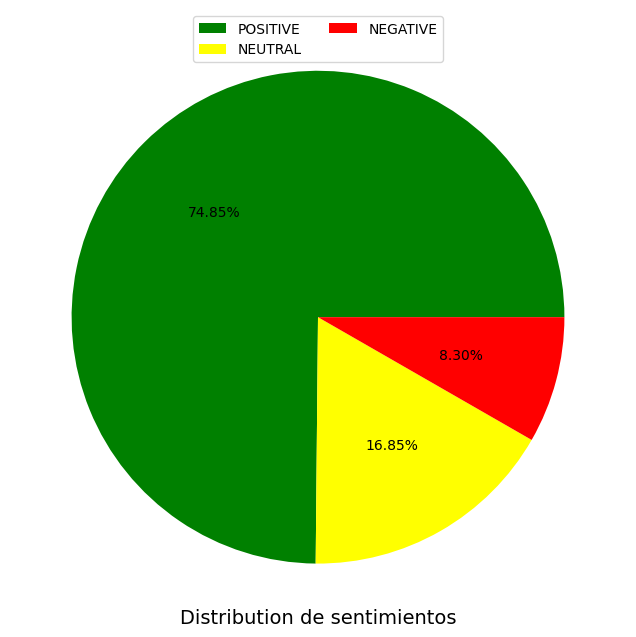

In [140]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE',"NEUTRAL",'NEGATIVE']
colors = ['green', 'yellow','red']
plt.pie(data['sentiment2'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution de sentimientos', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

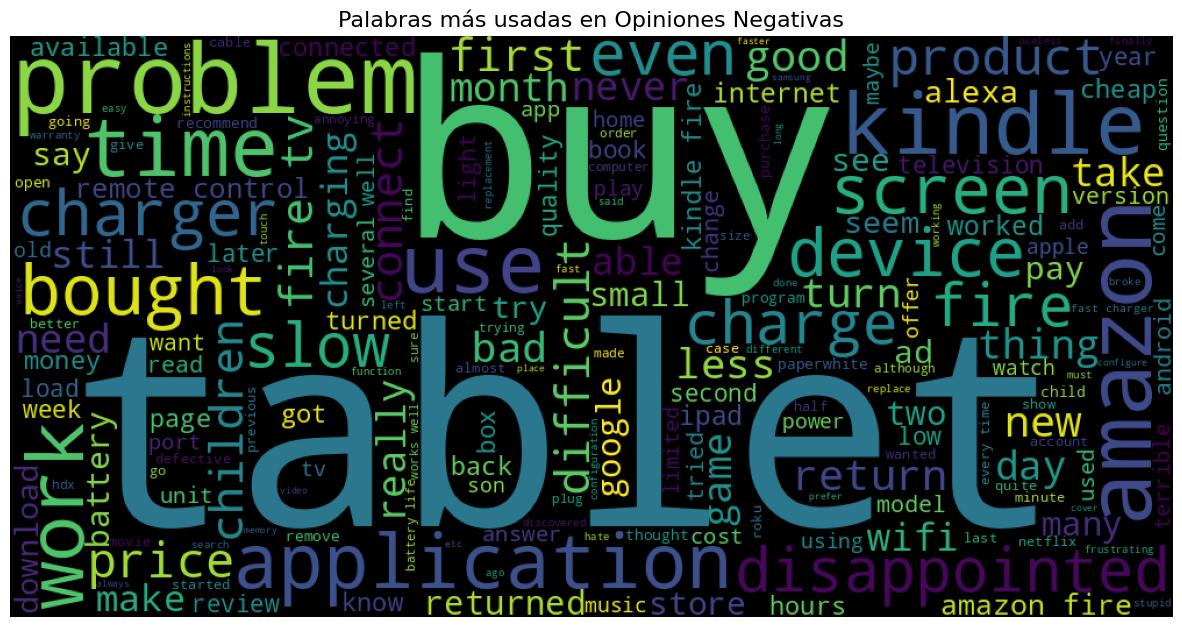

In [139]:
# get words used positive reivews
negativeWords = pd.Series(' '.join(data[data['sentiment2']=='NEGATIVE']["TextTraducido"]).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras más usadas en Opiniones Negativas", size=16)

plt.axis("off")
plt.show()

#### *Conclusion 1*

* Los modelos de bag of words son muy buenos a la hora de identificar textos de polaridades claras pero le cuesta mucho cuando los textos presentan polaridades inconcinas.

* para esto se utilizan modelos mas poderosos como transformers, modelos de aprendizaje supervisado y algunas aplicaciones de aprendizaje no supervisado.